## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 005 Example 009

In [1]:
sfeature=['F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08',
       'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18',
       'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28',
       'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38',
       'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48',
       'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58',
       'F59', 'F60', 'F61', 'F62', 'F63']
starget=['T00']

## Part A - Load Libraries

In [2]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part B - Load Data

In [3]:
fileName = '../../Data/Digits01.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Digits01.csv


In [4]:
datadf= pd.read_csv(fileFullName, header=0)
print(datadf.shape)
print(datadf.columns)

(1797, 66)
Index(['ID', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08',
       'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18',
       'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28',
       'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38',
       'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48',
       'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58',
       'F59', 'F60', 'F61', 'F62', 'F63', 'T00'],
      dtype='object')


In [5]:
datadf_X = datadf[sfeature].copy(deep=True)
data_X = np.array(datadf_X)

In [6]:
datadf_y = datadf[starget].copy(deep=True)
datadf_y.columns = (['T'])
datadf_y = datadf_y['T']
data_y = np.array(datadf_y)

## Part C - Project the 64-dimensional data onto a lower dimension

In [7]:
pca = PCA(n_components=15,
          whiten=False,
          copy=True,
          svd_solver='auto',
          tol=0.0,
          iterated_power='auto',
          random_state=0
         )
data = pca.fit_transform(data_X)

In [8]:
pca.get_params(deep=True)

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 15,
 'random_state': 0,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

## Part D - Deploy a grid search to cross-validation and optimize the bandwidth

In [9]:
kd = KernelDensity(metric='euclidean', 
                   atol=0, 
                   rtol=0, 
                   breadth_first=True, 
                   metric_params=None)

In [10]:
kd.get_params(deep=True)

{'algorithm': 'auto',
 'atol': 0,
 'bandwidth': 1.0,
 'breadth_first': True,
 'kernel': 'gaussian',
 'leaf_size': 40,
 'metric': 'euclidean',
 'metric_params': None,
 'rtol': 0}

In [11]:
params = {'bandwidth': np.logspace(-1, 1, 20),
          'leaf_size': np.arange(35,55,1),
          'kernel': np.array(['gaussian','tophat']),
          'algorithm':np.array(['kd_tree','ball_tree'])
         }

gs = GridSearchCV(kd,
                  params,
                  cv=10,
                  iid=True,
                  refit=True,
                  n_jobs=-1,
                  verbose=1)

In [12]:
gs.get_params(deep=True)

{'cv': 10,
 'error_score': 'raise-deprecating',
 'estimator__algorithm': 'auto',
 'estimator__atol': 0,
 'estimator__bandwidth': 1.0,
 'estimator__breadth_first': True,
 'estimator__kernel': 'gaussian',
 'estimator__leaf_size': 40,
 'estimator__metric': 'euclidean',
 'estimator__metric_params': None,
 'estimator__rtol': 0,
 'estimator': KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
        kernel='gaussian', leaf_size=40, metric='euclidean',
        metric_params=None, rtol=0),
 'fit_params': None,
 'iid': True,
 'n_jobs': -1,
 'param_grid': {'bandwidth': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
          0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
          1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
          3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
  'leaf_size': array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
         52, 53, 54]),


## Part D - Train the data

In [13]:
gs.fit(data)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 1735 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2554 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3542 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4636 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5769 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 6926 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 7876 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 9560 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 11370 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 13118 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 14468 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 15918 tasks  

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bandwidth': array([ 0.1    ,  0.12743,  0.16238,  0.20691,  0.26367,  0.33598,
        0.42813,  0.54556,  0.69519,  0.88587,  1.12884,  1.43845,
        1.83298,  2.33572,  2.97635,  3.79269,  4.83293,  6.15848,
        7.8476 , 10.     ]), 'leaf_size': array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54]), 'kernel': array(['gaussian', 'tophat'], dtype='<U8'), 'algorithm': array(['kd_tree', 'ball_tree'], dtype='<U9')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

## Part E - Get best bandwith solution

In [14]:
gs.best_estimator_

KernelDensity(algorithm='kd_tree', atol=0, bandwidth=3.79269019073225,
       breadth_first=True, kernel='gaussian', leaf_size=51,
       metric='euclidean', metric_params=None, rtol=0)

In [15]:
gs.best_params_

{'algorithm': 'kd_tree',
 'bandwidth': 3.79269019073225,
 'kernel': 'gaussian',
 'leaf_size': 51}

In [16]:
gs.cv_results_

C:\Users\AndreVermeulen\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\AndreVermeulen\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\AndreVermeulen\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*

{'mean_fit_time': array([0.00239992, 0.00229867, 0.00249856, ..., 0.00189893, 0.00629973,
        0.00150013]),
 'std_fit_time': array([0.0006638 , 0.00078102, 0.00092309, ..., 0.00144507, 0.00992086,
        0.0005004 ]),
 'mean_score_time': array([0.01439843, 0.01399908, 0.016699  , ..., 0.02329834, 0.02979863,
        0.02139902]),
 'std_score_time': array([0.0021548 , 0.0018983 , 0.00867149, ..., 0.00638667, 0.0134134 ,
        0.00586794]),
 'param_algorithm': masked_array(data=['kd_tree', 'kd_tree', 'kd_tree', ..., 'ball_tree',
                    'ball_tree', 'ball_tree'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_bandwidth': masked_array(data=[0.1, 0.1, 0.1, ..., 10.0, 10.0, 10.0],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['gaussian', 'gaussian', 'gaussian', ..., 'tophat',
        

In [17]:
print("Best bandwidth: {0}".format(gs.best_estimator_.bandwidth))
print("Best score    : {0}".format(gs.best_score_))

Best bandwidth: 3.79269019073225
Best score    : -8299.431714490673


## Part F - Deploy the best estimator to compute the kernel density estimate

In [18]:
kde = gs.best_estimator_
kde

KernelDensity(algorithm='kd_tree', atol=0, bandwidth=3.79269019073225,
       breadth_first=True, kernel='gaussian', leaf_size=51,
       metric='euclidean', metric_params=None, rtol=0)

### Part G - Sample 72 new points from the data set

In [41]:
new_data = kde.sample(72, random_state=51)
new_data = pca.inverse_transform(new_data)


## Part H - Convert data into a 6x12 grid

In [43]:
new_data = new_data.reshape((6, 12, -1))
real_data = data_X[:72].reshape((6, 12, -1))

## Part I - Plot Real digits and resampled digits

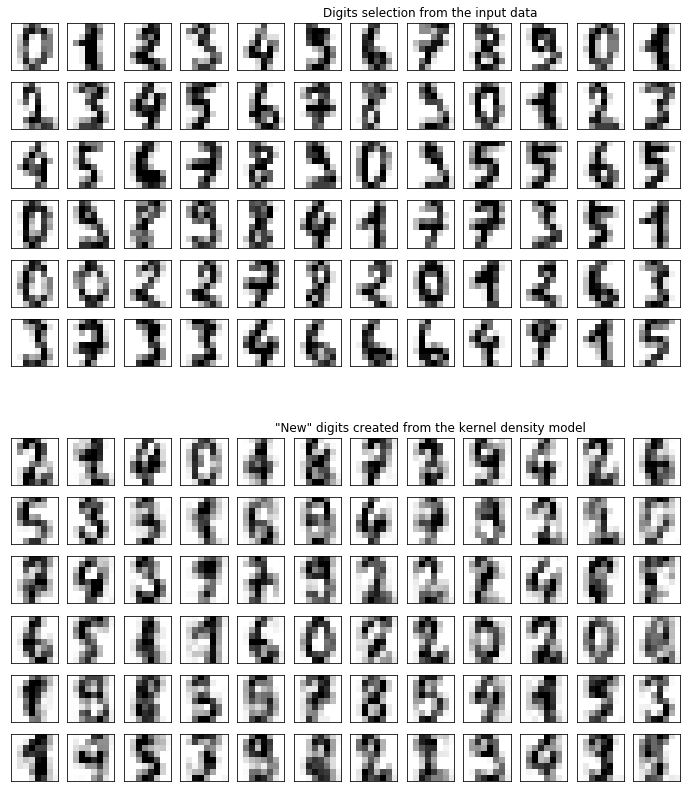

In [45]:
fig = plt.figure(figsize=(12, 14))
ax = fig.subplots(13, 12, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(12):
    ax[6, j].set_visible(False)
    for i in range(6):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 7, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 7].set_title('Digits selection from the input data')
ax[7, 7].set_title('"New" digits created from the kernel density model')

plt.show()

## Part J - Save image

In [46]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-009-01.jpg'])
fig.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 05


## Done

In [47]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-16 14:42:54.707749
